# Predicting the Energy Efficiency of Buildings

📌 In this section, predicting the energy efficiency of buildings with machine learning algorithms.

# Business Problem

📌 The dataset includes features such as surface/wall/roof area, glass area, glass area distribution and orientation of 768 simulated building shapes. Based on this data, it is aimed to estimate the heating and cooling load of the building. In this age where environmental awareness is very important, it can be a super consultancy initiative to reduce our carbon footprint, as we still haven't switched to renewable energy sources.

# Dataset Story

**Data Set Information:**

📌 We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**

📌 The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

# Import Dataset

In [ ]:
df = pd.read_csv("ENB2012_data.csv")
df.head()

# General Information About to the Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

# Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

In [45]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [47]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

       X1  Ration
X1               
0.980  64   8.333
0.900  64   8.333
0.860  64   8.333
0.820  64   8.333
0.790  64   8.333
0.760  64   8.333
0.740  64   8.333
0.710  64   8.333
0.690  64   8.333
0.660  64   8.333
0.640  64   8.333
0.620  64   8.333
##########################################


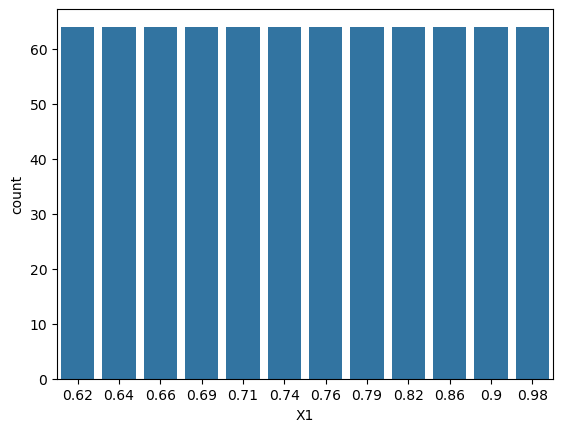

         X2  Ration
X2                 
514.500  64   8.333
563.500  64   8.333
588.000  64   8.333
612.500  64   8.333
637.000  64   8.333
661.500  64   8.333
686.000  64   8.333
710.500  64   8.333
735.000  64   8.333
759.500  64   8.333
784.000  64   8.333
808.500  64   8.333
##########################################


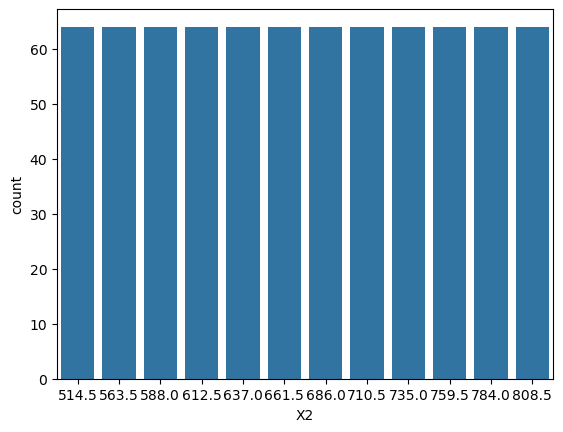

          X3  Ration
X3                  
294.000  192  25.000
318.500  192  25.000
343.000  128  16.667
416.500   64   8.333
245.000   64   8.333
269.500   64   8.333
367.500   64   8.333
##########################################


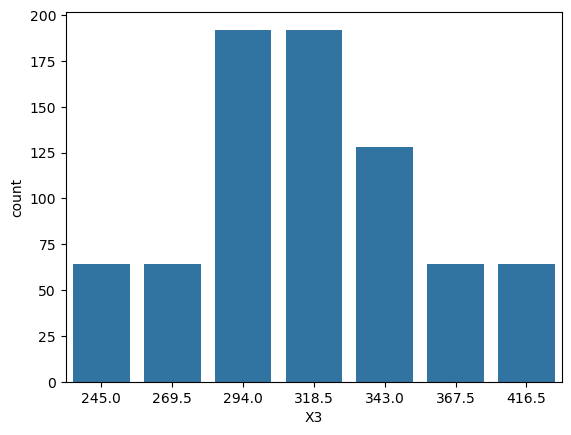

          X4  Ration
X4                  
220.500  384  50.000
147.000  192  25.000
122.500  128  16.667
110.250   64   8.333
##########################################


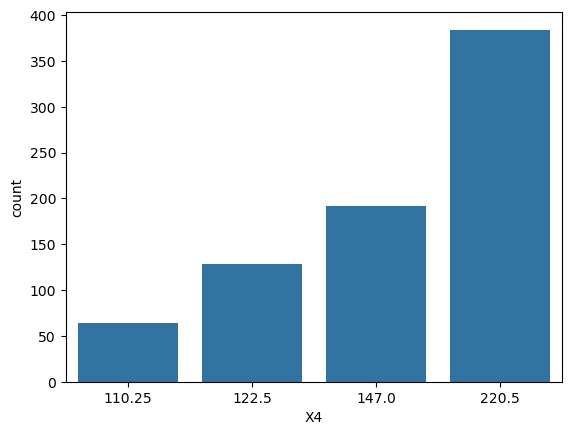

        X5  Ration
X5                
7.000  384  50.000
3.500  384  50.000
##########################################


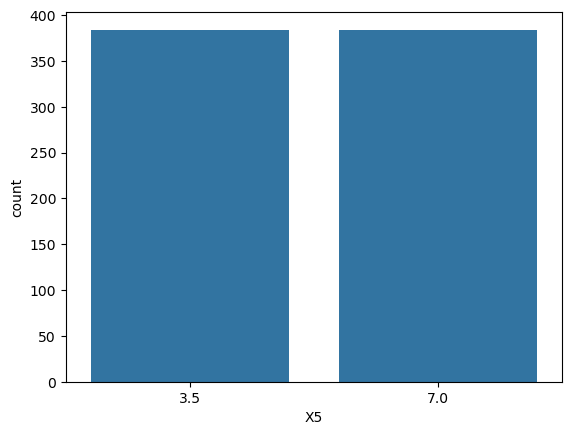

     X6  Ration
X6             
2   192  25.000
3   192  25.000
4   192  25.000
5   192  25.000
##########################################


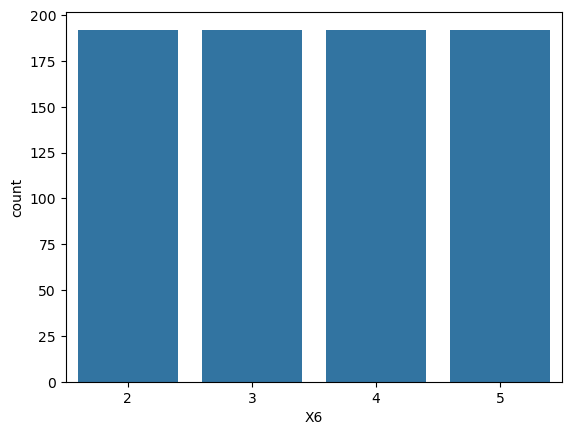

        X7  Ration
X7                
0.100  240  31.250
0.250  240  31.250
0.400  240  31.250
0.000   48   6.250
##########################################


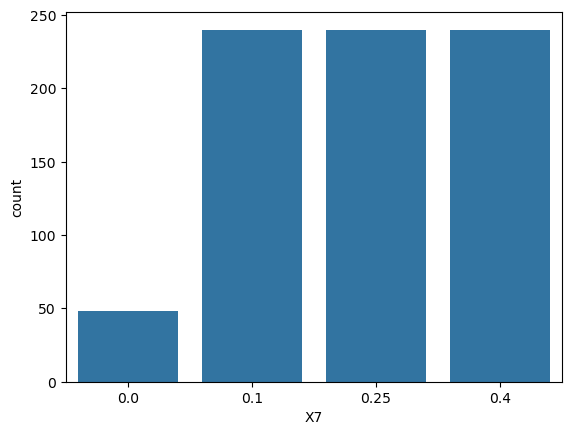

     X8  Ration
X8             
1   144  18.750
2   144  18.750
3   144  18.750
4   144  18.750
5   144  18.750
0    48   6.250
##########################################


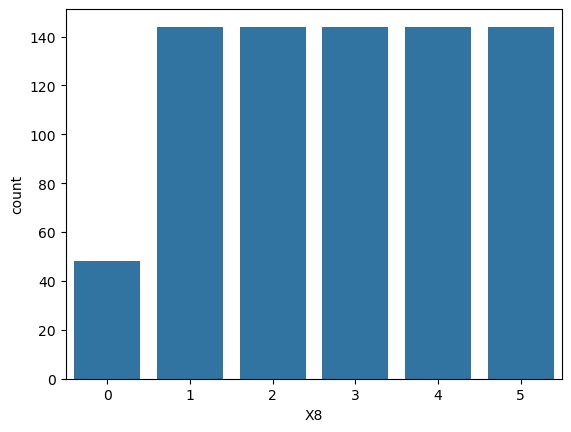

In [49]:
cat_summary_df(df)

In [50]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [51]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   768.000
mean     22.307
std      10.090
min       6.010
1%        6.648
5%       10.464
10%      11.217
20%      12.630
30%      14.320
40%      15.230
50%      18.950
60%      25.668
70%      29.089
80%      32.508
90%      36.703
95%      39.860
99%      42.090
max      43.100
Name: Y1, dtype: float64


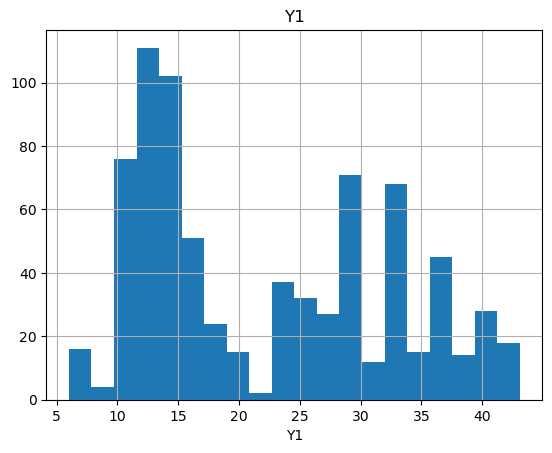

count   768.000
mean     24.588
std       9.513
min      10.900
1%       11.727
5%       13.617
10%      14.237
20%      15.116
30%      16.278
40%      17.720
50%      22.080
60%      28.286
70%      31.263
80%      34.062
90%      37.422
95%      40.037
99%      45.543
max      48.030
Name: Y2, dtype: float64


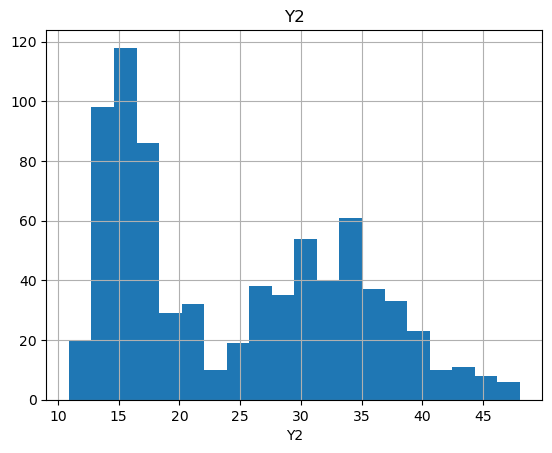

In [55]:
num_summary_df(df)

In [57]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(10,4))
  for index, col in enumerate(num_cols):
    plt.subplot(1,2,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

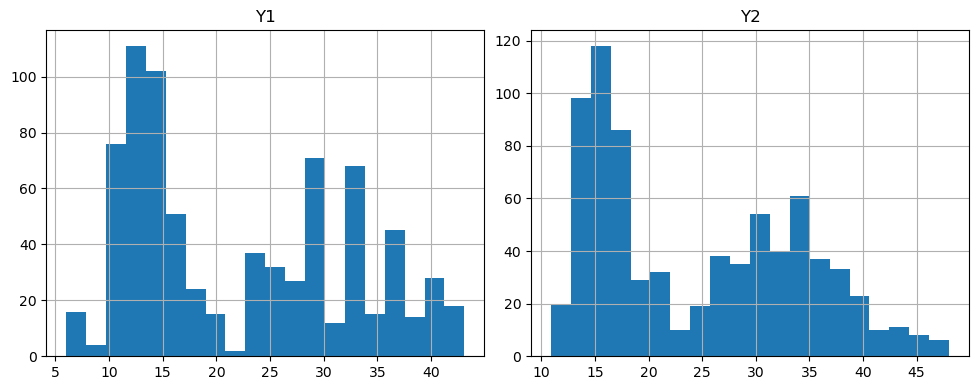

In [59]:
plot_num_summary(df)

In [61]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))
  print("#############################################")

In [63]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [65]:
target_summary_with_cat_df(df, "Y1")

       Target Mean
X1                
0.620       14.283
0.640       16.615
0.660       12.817
0.690       12.389
0.710       12.040
0.740       11.887
0.760       35.664
0.790       38.608
0.820       25.555
0.860       28.553
0.900       31.629
0.980       27.646
#############################################
         Target Mean
X2                  
514.500       27.646
563.500       31.629
588.000       28.553
612.500       25.555
637.000       38.608
661.500       35.664
686.000       11.887
710.500       12.040
735.000       12.389
759.500       12.817
784.000       16.615
808.500       14.283
#############################################
         Target Mean
X3                  
245.000       11.887
269.500       12.040
294.000       22.863
318.500       23.334
343.000       27.612
367.500       14.283
416.500       35.664
#############################################
         Target Mean
X4                  
110.250       27.646
122.500       33.647
147.000       30.905
220.500 

In [67]:
target_summary_with_cat_df(df, "Y2")

       Target Mean
X1                
0.620       15.244
0.640       20.227
0.660       15.870
0.690       15.242
0.710       15.035
0.740       14.810
0.760       36.407
0.790       40.239
0.820       28.028
0.860       30.912
0.900       33.821
0.980       29.217
#############################################
         Target Mean
X2                  
514.500       29.217
563.500       33.821
588.000       30.912
612.500       28.028
637.000       40.239
661.500       36.407
686.000       14.810
710.500       15.035
735.000       15.242
759.500       15.870
784.000       20.227
808.500       15.244
#############################################
         Target Mean
X3                  
245.000       14.810
269.500       15.035
294.000       25.124
318.500       25.906
343.000       30.233
367.500       15.244
416.500       36.407
#############################################
         Target Mean
X4                  
110.250       29.217
122.500       35.114
147.000       33.060
220.500 

# Examination of the dependent variable

In [70]:
def exam_dependent_variable(dataframe, target):
  plt.figure(figsize=(16,4))
  plt.subplot(121)
  dataframe[target].hist(bins=100)
  plt.title(target + ", Histogram")
  plt.subplot(122)
  np.log1p(dataframe[target]).hist(bins=50)
  plt.title(target + ", Logaritmic Histogram")

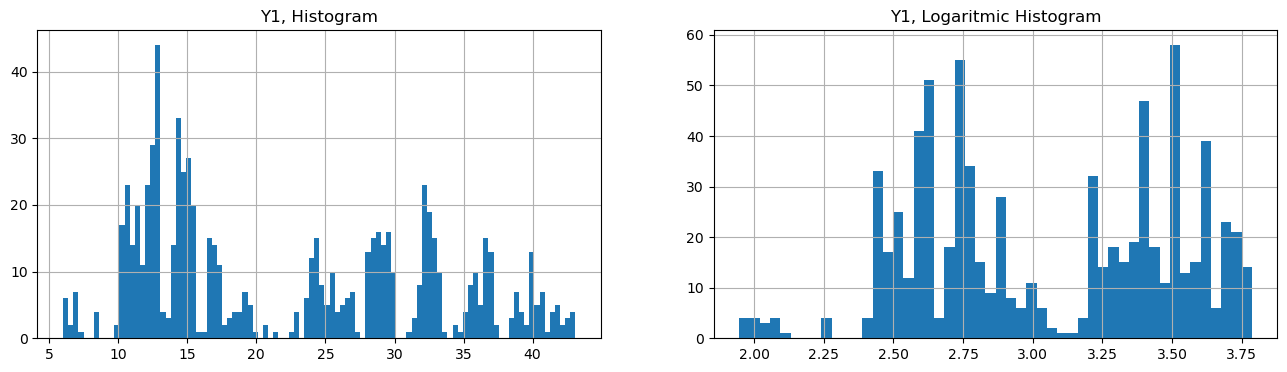

In [72]:
exam_dependent_variable(df, "Y1")

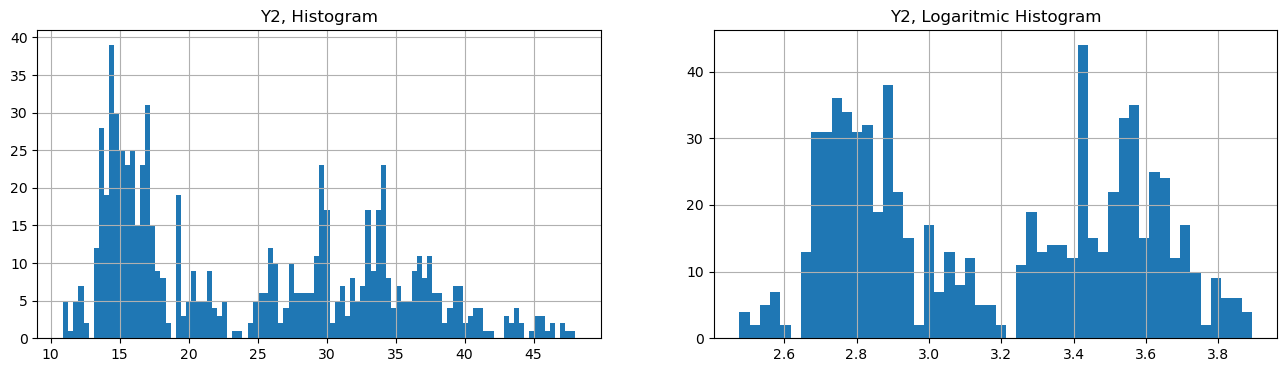

In [74]:
exam_dependent_variable(df, "Y2")

# Correlation Analysis

In [77]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000,-0.992,-0.204,-0.869,0.828,0.000,-0.000,-0.000,0.622,0.634
X2,-0.992,1.000,0.196,0.881,-0.858,-0.000,0.000,0.000,-0.658,-0.673
X3,-0.204,0.196,1.000,-0.292,0.281,-0.000,-0.000,0.000,0.456,0.427
X4,-0.869,0.881,-0.292,1.000,-0.973,-0.000,-0.000,-0.000,-0.862,-0.863
X5,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,-0.000,0.889,0.896
X6,0.000,-0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,-0.003,0.014
X7,-0.000,0.000,-0.000,-0.000,0.000,-0.000,1.000,0.213,0.270,0.208
X8,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.213,1.000,0.087,0.051
Y1,0.622,-0.658,0.456,-0.862,0.889,-0.003,0.270,0.087,1.000,0.976
Y2,0.634,-0.673,0.427,-0.863,0.896,0.014,0.208,0.051,0.976,1.000


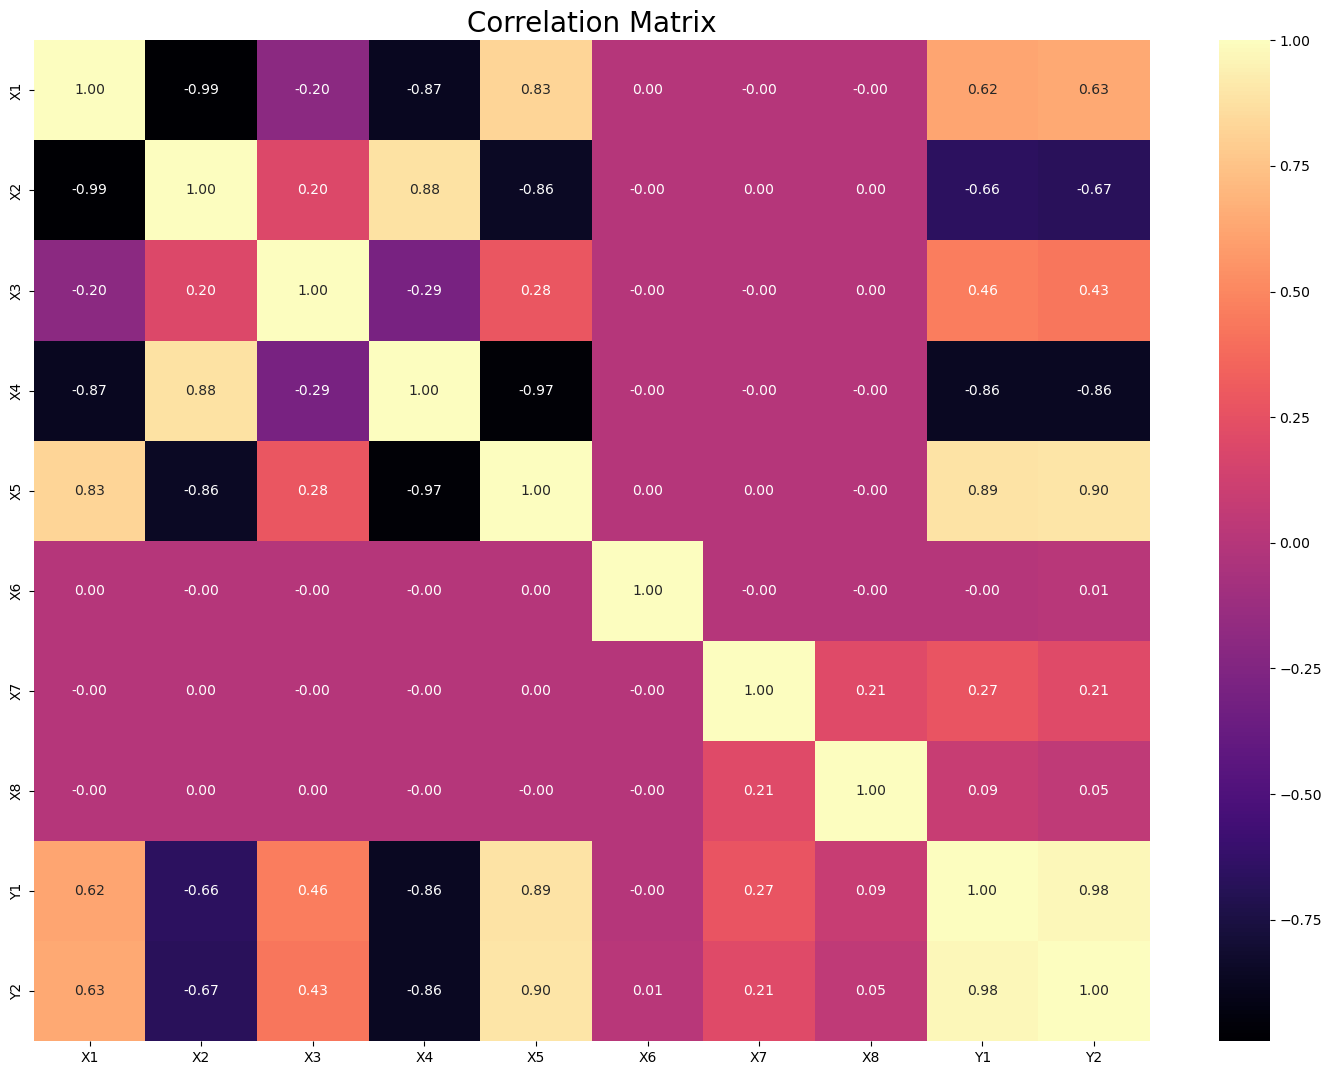

In [79]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [143]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

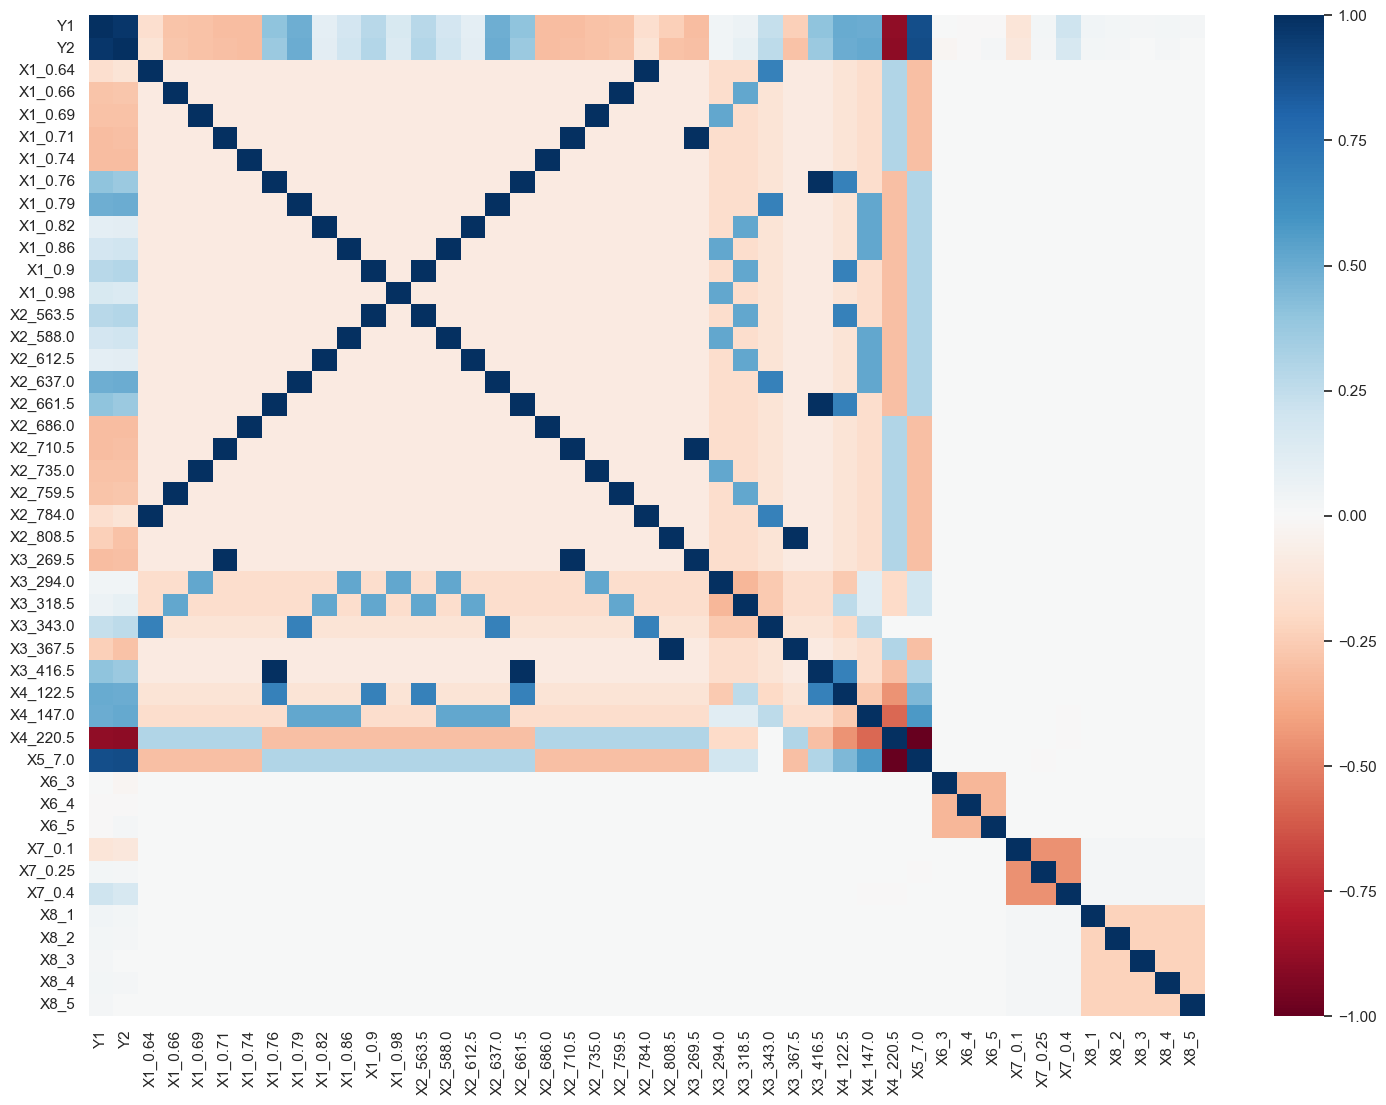

['Y2',
 'X2_563.5',
 'X2_588.0',
 'X2_612.5',
 'X2_637.0',
 'X2_661.5',
 'X2_686.0',
 'X2_710.5',
 'X2_735.0',
 'X2_759.5',
 'X2_784.0',
 'X3_269.5',
 'X3_367.5',
 'X3_416.5',
 'X5_7.0']

In [145]:
high_correlated_cols(df, plot=True)

# Outlier Analysis

In [147]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [148]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [149]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [150]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [151]:
solve_outliers(df, "Y1")

Y2 False


In [152]:
solve_outliers(df, "Y2")

Y1 False


In [153]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [154]:
check_outlier_df(df, "Y1")

Y2 False


In [155]:
check_outlier_df(df, "Y2")

Y1 False


# Missing Value Analysis

In [157]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [158]:
na_columns = missing_value_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [159]:
df.isnull().sum()

Y1          0
Y2          0
X1_0.64     0
X1_0.66     0
X1_0.69     0
X1_0.71     0
X1_0.74     0
X1_0.76     0
X1_0.79     0
X1_0.82     0
X1_0.86     0
X1_0.9      0
X1_0.98     0
X2_563.5    0
X2_588.0    0
X2_612.5    0
X2_637.0    0
X2_661.5    0
X2_686.0    0
X2_710.5    0
X2_735.0    0
X2_759.5    0
X2_784.0    0
X2_808.5    0
X3_269.5    0
X3_294.0    0
X3_318.5    0
X3_343.0    0
X3_367.5    0
X3_416.5    0
X4_122.5    0
X4_147.0    0
X4_220.5    0
X5_7.0      0
X6_3        0
X6_4        0
X6_5        0
X7_0.1      0
X7_0.25     0
X7_0.4      0
X8_1        0
X8_2        0
X8_3        0
X8_4        0
X8_5        0
dtype: int64

# Encoding Scaling

In [161]:
def label_encoding(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [162]:
def label_encoder(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
  for col in binary_cols:
      dataframe = label_encoding(dataframe, col)
  return dataframe

In [163]:
df = label_encoder(df)

In [164]:
def one_hot_encoder(dataframe, target, drop_first=False):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
    cat_cols = [col for col in cat_cols if col not in binary_cols and col not in [target]]
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [165]:
df = one_hot_encoder(df, ["Y1","Y2"], drop_first=True)

In [166]:
df.head()

,Y1,Y2,X1_0.64_True,X1_0.66_True,X1_0.69_True,X1_0.71_True,X1_0.74_True,X1_0.76_True,X1_0.79_True,X1_0.82_True,X1_0.86_True,X1_0.9_True,X1_0.98_True,X2_563.5_True,X2_588.0_True,X2_612.5_True,X2_637.0_True,X2_661.5_True,X2_686.0_True,X2_710.5_True,X2_735.0_True,X2_759.5_True,X2_784.0_True,X2_808.5_True,X3_269.5_True,X3_294.0_True,X3_318.5_True,X3_343.0_True,X3_367.5_True,X3_416.5_True,X4_122.5_True,X4_147.0_True,X4_220.5_True,X5_7.0_True,X6_3_True,X6_4_True,X6_5_True,X7_0.1_True,X7_0.25_True,X7_0.4_True,X8_1_True,X8_2_True,X8_3_True,X8_4_True,X8_5_True
0,15.550,21.330,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,15.550,21.330,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,15.550,21.330,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,15.550,21.330,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,20.840,28.280,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False


# Create a Base Model

In [168]:

def create_base_model(dataframe, target, plot=False, save_results=False):
  names = []
  train_rmse_results = []
  test_rmse_results = []
  train_r2_scores = []
  test_r2_scores = []
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
  models = [('LR', LinearRegression()),
            ("Ridge", Ridge()),
            ("Lasso", Lasso()),
            ("ElasticNet", ElasticNet()),
            ('KNN', KNeighborsRegressor()),
            ('CART', DecisionTreeRegressor()),
            ('RF', RandomForestRegressor()),
            ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

  print("###################### Mean and Std(Target Variable) ######################")
  print("Mean: " , dataframe[target].mean())
  print("\n")
  print("Std: ", dataframe[target].std())
  print("###################### Model Results ######################")

  for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    # RMSE
    train_rmse_result = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_result = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse_results.append(train_rmse_result)
    test_rmse_results.append(test_rmse_result)
    # score
    train_r2_score = regressor.score(X_train, y_train)
    test_r2_score = regressor.score(X_test, y_test)
    train_r2_scores.append(train_r2_score)
    test_r2_scores.append(test_r2_score)
    # Model names
    names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'RMSE_Train': train_rmse_results,
                                'RMSE_Test': test_rmse_results,
                                'R2_score_Train': train_r2_scores,
                                'R2_score_Test': test_r2_scores
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="RMSE_Test", ascending=True)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='RMSE_Test', y=model_results.index, data=model_results, color="r")
    plt.xlabel('RMSE Values')
    plt.ylabel('Model Names')
    plt.title('RMSE_Test for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

###################### Mean and Std(Target Variable) ######################
Mean:  Y1   22.307
Y2   24.588
dtype: float64


Std:  Y1   10.090
Y2    9.513
dtype: float64
###################### Model Results ######################
             RMSE_Train  RMSE_Test  R2_score_Train  R2_score_Test
Model_Names                                                      
XGBoost           0.064      0.669           1.000          0.995
Ridge             1.422      1.358           0.979          0.979
LR                1.428      1.379           0.978          0.978
RF                0.545      1.651           0.997          0.969
CART              0.000      1.962           1.000          0.956
KNN               1.817      1.963           0.966          0.958
Lasso             4.958      4.380           0.747          0.790
ElasticNet        6.047      5.672           0.623          0.648


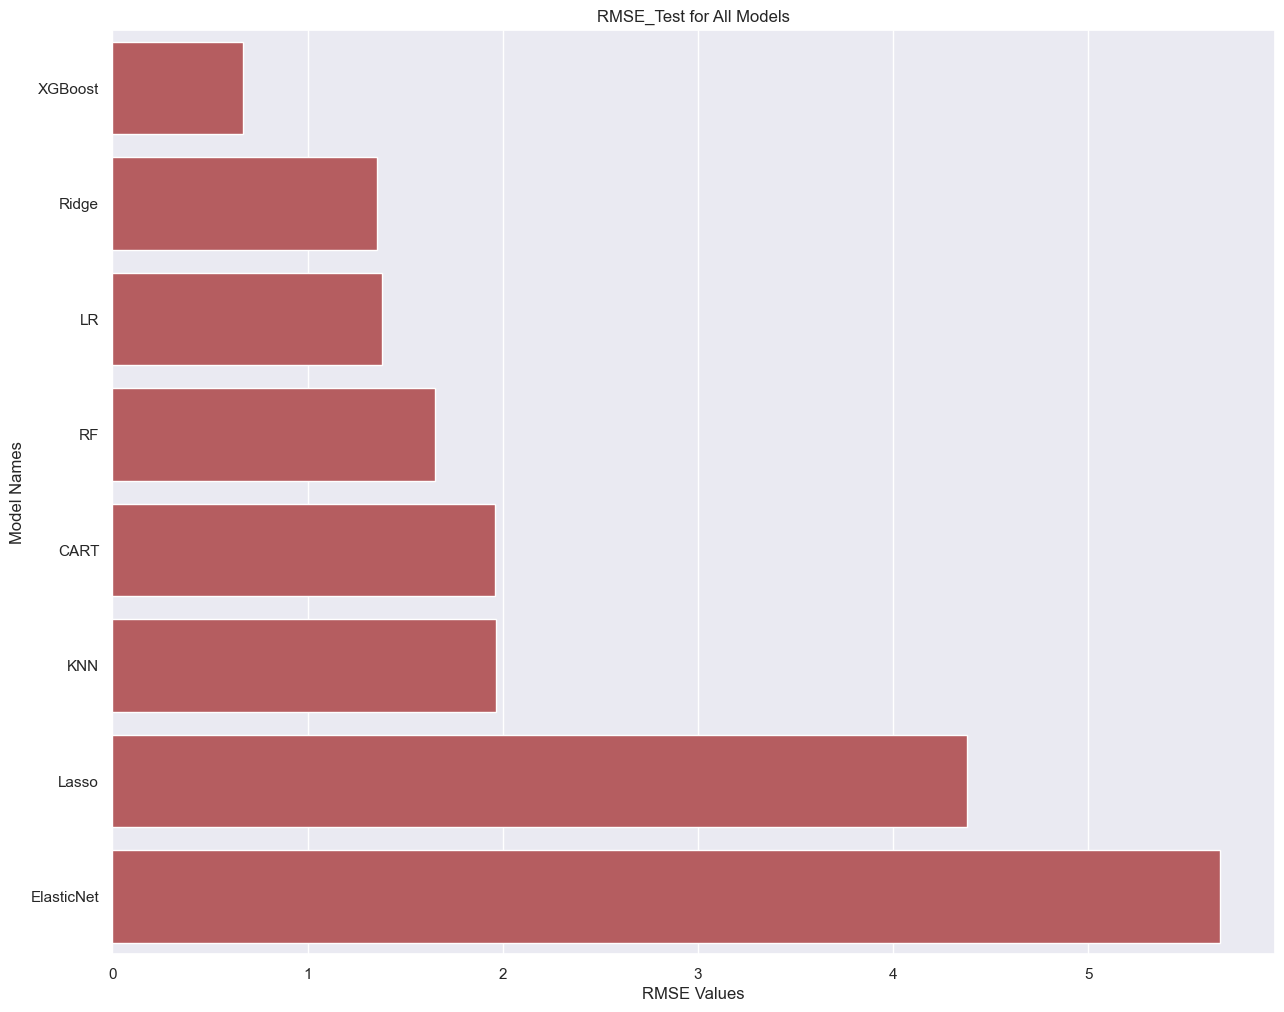

In [169]:
model_results = create_base_model(df, target=["Y1","Y2"], plot=True, save_results=True)

# Create Model Tuned

In [171]:
def create_model_tuned(dataframe, target, plot=True, save_results=True):
  names = []
  train_rmse_results = []
  test_rmse_results = []
  train_r2_scores = []
  test_r2_scores = []
  best_params = []
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

  ridge_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  lasso_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  enet_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  knn_params = {"n_neighbors": np.arange(1,50,1)}

  cart_params = {"min_samples_split": range(2,100),
                  "max_leaf_nodes": range(2,10)}

  xgboost_params = {"colsample_bytree": [0.4, 0.5 ,0.6],
                      "n_estimators": [200, 500, 1000],
                      "max_depth": [3,5,8],
                      "learning_rate": [0.1, 0.01]}

  rf_params = {"max_depth": [5, 8, 15, None],
              "max_features": [5, 7, "auto"],
              "min_samples_split": [8, 15, 20],
              "n_estimators": [200, 500]}

  regressors = [("Ridge", Ridge(), ridge_params),
              ("Lasso", Lasso(), lasso_params),
              ("ENet", ElasticNet(), enet_params),
              ("KNN", KNeighborsRegressor(), knn_params),
              ("CART", DecisionTreeRegressor(), cart_params),
              ("XGBoost", XGBRegressor(objective="reg:squarederror"), xgboost_params),
              ("RF", RandomForestRegressor(), rf_params)]

  for name, regressor, params in regressors:
    print(f"#################### {name} ####################")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)

    final_model = regressor.set_params(**gs_best.best_params_).fit(X_train, y_train)
    train_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
    test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))
    train_rmse_results.append(train_rmse_result)
    test_rmse_results.append(test_rmse_result)
    train_r2_score = final_model.score(X_train, y_train)
    test_r2_score = final_model.score(X_test, y_test)
    train_r2_scores.append(train_r2_score)
    test_r2_scores.append(test_r2_score)
    print(f"RMSE_Train: {round(train_rmse_result, 4)} , RMSE_Test: {round(test_rmse_result, 4)} , R2_Train: {round(train_r2_score, 3)} , R2_Test: {round(test_r2_score, 3)} (Tuned Model) ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_params.append(gs_best.best_params_)
    names.append(name)
  
  model_tuned_results = pd.DataFrame({'Model_Names': names,
                                'RMSE_Train': train_rmse_results,
                                'RMSE_Test': test_rmse_results,
                                'R2_score_Train': train_r2_scores,
                                'R2_score_Test': test_r2_scores,
                                "best_params": best_params
                                }).set_index("Model_Names")
  model_tuned_results=model_tuned_results.sort_values(by="RMSE_Test", ascending=True)
  print(model_tuned_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='RMSE_Test', y=model_tuned_results.index, data=model_tuned_results, color="r")
    plt.xlabel('RMSE Values')
    plt.ylabel('Model Names')
    plt.title('RMSE_Test for All Models')
    plt.show()
  
  if save_results:
    model_tuned_results.to_csv("model_tuned_results.csv")
  
  return model_tuned_results

In [ ]:
model_tuned_results = create_model_tuned(df, ["Y1","Y2"], plot=True, save_results=True)

#################### Ridge ####################
RMSE_Train: 1.485 , RMSE_Test: 1.4755 , R2_Train: 0.979 , R2_Test: 0.979 (Tuned Model) (Ridge) 
Ridge best params: {'alpha': 0.005}

#################### Lasso ####################
RMSE_Train: 1.4844 , RMSE_Test: 1.4796 , R2_Train: 0.979 , R2_Test: 0.979 (Tuned Model) (Lasso) 
Lasso best params: {'alpha': 0.005}

#################### ENet ####################
RMSE_Train: 1.4921 , RMSE_Test: 1.4964 , R2_Train: 0.978 , R2_Test: 0.979 (Tuned Model) (ENet) 
ENet best params: {'alpha': 0.005}

#################### KNN ####################
RMSE_Train: 2.3253 , RMSE_Test: 2.0457 , R2_Train: 0.97 , R2_Test: 0.955 (Tuned Model) (KNN) 
KNN best params: {'n_neighbors': 4}

#################### CART ####################


D:\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RMSE_Train: 2.4189 , RMSE_Test: 2.4107 , R2_Train: 0.942 , R2_Test: 0.954 (Tuned Model) (CART) 
CART best params: {'max_leaf_nodes': 9, 'min_samples_split': 54}

#################### XGBoost ####################
